In [3]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame as df
import seaborn as sns
from pandas import read_csv as rc
import statistics as stat

Data: Empirical

Full Sample

In [4]:
AL_k3 = rc("../../../../../DataCentre/RSS_AL/k3/Evaluation/AL/full_sample_AL.csv", index_col = "Unnamed: 0")
Fixed_models_k3 = rc("../../../../../DataCentre/RSS_AL/k3/Evaluation/FM/full_sample_Fixed.csv", index_col = "Unnamed: 0")
heatmap_columns = ["MSE", "Percentage Correct", "Sharpe Ratio", "Annualised Return", "MDD"]
AL_k3 = AL_k3[heatmap_columns]
AL_k3 = AL_k3.rename(columns = {"Percentage Correct": "CS", "Sharpe Ratio": "SR", "Annualised Return": "ANR"})
Fixed_models_k3 = Fixed_models_k3[heatmap_columns]
Fixed_models_k3 = Fixed_models_k3.rename(columns = {"Percentage Correct": "CS", "Sharpe Ratio": "SR", "Annualised Return": "ANR"})

2020

In [5]:
AL_k3_2020 = rc("../../../../../DataCentre/RSS_AL/k3/Evaluation/AL/2020_AL.csv", index_col = "Unnamed: 0")
Fixed_models_k3_2020 = rc("../../../../../DataCentre/RSS_AL/k3/Evaluation/FM/2020_Fixed.csv", index_col = "Unnamed: 0")
AL_k3_2020 = AL_k3_2020[heatmap_columns]
AL_k3_2020 = AL_k3_2020.rename(columns = {"Percentage Correct": "CS", "Sharpe Ratio": "SR", "Annualised Return": "ANR"})
Fixed_models_k3_2020 = Fixed_models_k3_2020[heatmap_columns]
Fixed_models_k3_2020 = Fixed_models_k3_2020.rename(columns = {"Percentage Correct": "CS", "Sharpe Ratio": "SR", "Annualised Return": "ANR"})

In [6]:
# Removing Long Only
Fixed_models_k3 = Fixed_models_k3[:-1]
AL_k3 = AL_k3[:-1]
AL_k3_2020 = AL_k3_2020[:-1]
Fixed_models_k3_2020 = Fixed_models_k3_2020[:-1]

Data: Simulations

In [7]:
Sharpe = rc("../../../../../DataCentre/RSS_AL/Section_3/3.2.3_SysC/Sharpes.csv",index_col='Unnamed: 0')
MSE = rc("../../../../../DataCentre/RSS_AL/Section_3/3.2.3_SysC/MSE.csv")
MDD = rc("../../../../../DataCentre/RSS_AL/Section_3/3.2.3_SysC/MDD.csv")
perc_correct = rc("../../../../../DataCentre/RSS_AL/Section_3/3.2.3_SysC/perc_correct.csv")
Ann_returns = rc("../../../../../DataCentre/RSS_AL/Section_3/3.2.3_SysC/AnnReturns.csv")
t_simu = MDD['t_simu']
t50 = t_simu[t_simu == 50]
t70 = t_simu[t_simu == 70]

In [8]:
MSE = MSE[MSE.columns.difference(['Long Only'])]
Sharpe = Sharpe[Sharpe.columns.difference(['Long Only'])]
MDD = MDD[MDD.columns.difference(['Long Only'])]
perc_correct = perc_correct[perc_correct.columns.difference(['Long Only'])]
Ann_returns = Ann_returns[Ann_returns.columns.difference(['Long Only'])]

In [62]:
MSE_50 = MSE.loc[t50.index]
Sharpe_50 = Sharpe.loc[t50.index]
MDD_50 = MDD.loc[t50.index]
perc_correct_50 = perc_correct.loc[t50.index]
Ann_returns_50 = Ann_returns.loc[t50.index]

MSE_70 = MSE.loc[t70.index]
Sharpe_70 = Sharpe.loc[t70.index]
MDD_70 = MDD.loc[t70.index]
perc_correct_70 = perc_correct.loc[t70.index]
Ann_returns_70 = Ann_returns.loc[t70.index]

In [61]:
# del MSE['Unnamed: 0']
del perc_correct['Unnamed: 0']

In [9]:
AR_columns = ["(AR1, w20)", "(AR1, w40)", "(AR2, w20)", "(AR2, w40)", "(AR3, w20)", "(AR3, w40)"]
AL_columns = ["Ensemble", "Ensemble Multi-Valued", "Ensemble MC", "EN MC", "EN Multi-Valued", "EN", 'Huber-Norm', "Huber-Ensemble"]

# MSE Fixed models
MSE_AR = MSE[AR_columns]
MSE_AR_50 = MSE_AR.loc[t50.index]
MSE_AR_70 = MSE_AR.loc[t70.index]

# MSE AL models
MSE_AL = MSE[AL_columns]
MSE_AL_50 = MSE_AL.loc[t50.index]
MSE_AL_70 = MSE_AL.loc[t70.index]

# SR Fixed models
Sharpe_AR = Sharpe[AR_columns]
Sharpe_AR_50 = Sharpe_AR.loc[t50.index]
Sharpe_AR_70 = Sharpe_AR.loc[t70.index]

# SR AL models
Sharpe_AL = Sharpe[AL_columns]
Sharpe_AL_50 = Sharpe_AL.loc[t50.index]
Sharpe_AL_70 = Sharpe_AL.loc[t70.index]

# MDD Fixed models
MDD_AR = MDD[AR_columns]
MDD_AR_50 = MDD_AR.loc[t50.index]
MDD_AR_70 = MDD_AR.loc[t70.index]

# MDD AL models
MDD_AL = MDD[AL_columns]
MDD_AL_50 = MDD_AL.loc[t50.index]
MDD_AL_70 = MDD_AL.loc[t70.index]

# perc. correct Fixed models
perc_correct_AR = perc_correct[AR_columns]
perc_correct_AR_50 = perc_correct_AR.loc[t50.index]
perc_correct_AR_70 = perc_correct_AR.loc[t70.index]

# perc. correct AL models
perc_correct_AL = perc_correct[AL_columns]
perc_correct_AL_50 = perc_correct_AL.loc[t50.index]
perc_correct_AL_70 = perc_correct_AL.loc[t70.index]

# Ann. returns Fixed models
Ann_return_AR = Ann_returns[AR_columns]
Ann_return_AR_50 = Ann_return_AR.loc[t50.index]
Ann_return_AR_70 = Ann_return_AR.loc[t70.index]

# Ann. returns AL models
Ann_return_AL = Ann_returns[AL_columns]
Ann_return_AL_50 = Ann_return_AL.loc[t50.index]
Ann_return_AL_70 = Ann_return_AL.loc[t70.index]

In [90]:
def plot_distribution(df_metrics, metric, color):
    sns.set_style("whitegrid")
    if color == 'b':
        ax = sns.distplot(np.array(df_metrics).reshape(-1, 1).flatten(),  kde_kws={"color": color, "lw": 1.5, "label": r"$t^c = 50$"})
        ax.axvline(np.array(df_metrics).reshape(-1, 1).flatten().mean(), color = 'gold', linewidth = 1.5, label = r"Mean $t^c = 50$")
        ax.axvline(stat.median(np.array(df_metrics).reshape(-1, 1).flatten()), color = 'mediumspringgreen',linewidth = 1.5, label = r"Median $t^c = 50$")
    if color == 'r':
        ax = sns.distplot(np.array(df_metrics).reshape(-1, 1).flatten(),  color = 'red', kde_kws={"color": "r", "lw": 1.5, "label": r"$t^c = 70$"})
        ax.axvline(np.array(df_metrics).reshape(-1, 1).flatten().mean(), color = 'mediumpurple', linewidth = 1.5, label = r"Mean $t^c = 70$")
        ax.axvline(stat.median(np.array(df_metrics).reshape(-1, 1).flatten()), color = 'navy',linewidth = 1.5, label = r"Median $t^c = 70$")
    ax.set_xlabel(f"{metric}", fontsize = 12)

    ax.set_ylabel("Kernel Density", fontsize = 12)
    ax.set_title(f'{metric} distribution: All models', fontsize = 12)
    ax.tick_params(labelsize=10)
    ax.legend(fontsize = 10)


/Users/ryanlucas/anaconda3/envs/poker/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ryanlucas/anaconda3/envs/poker/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


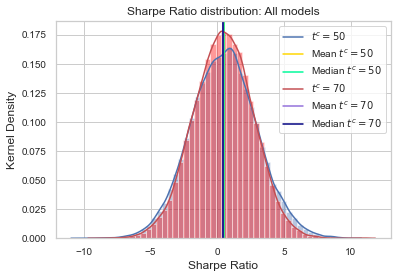

In [56]:
plot_distribution(Sharpe_50, "Sharpe Ratio", 'b')
plot_distribution(Sharpe_70, "Sharpe Ratio", 'r')
plt.savefig(f"/users/ryanlucas/Desktop/Sharpe.png")

/Users/ryanlucas/anaconda3/envs/poker/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ryanlucas/anaconda3/envs/poker/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(-0.005, 0.03)

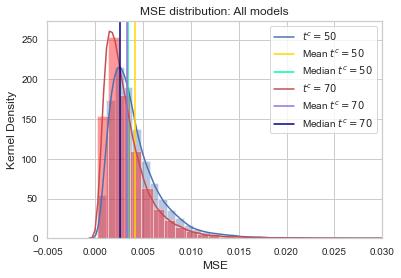

In [96]:
fig, ax = plt.subplots()
plot_distribution(MSE_50, "MSE", 'b')
plot_distribution(MSE_70, "MSE", 'r')
plt.savefig(f"/users/ryanlucas/Desktop/MSE.png")
ax.set_xlim([-0.005, 0.03])

/Users/ryanlucas/anaconda3/envs/poker/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ryanlucas/anaconda3/envs/poker/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


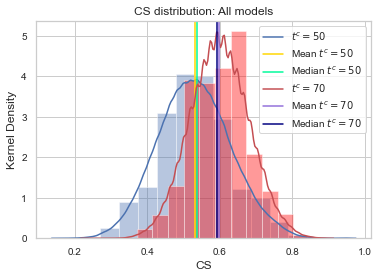

In [77]:
plot_distribution(perc_correct_50, "CS", 'b')
plot_distribution(perc_correct_70, "CS", 'r')
plt.savefig(f"/users/ryanlucas/Desktop/CS.png")

In [82]:
del Ann_returns_50['Unnamed: 0']
del Ann_returns_70['Unnamed: 0']

/Users/ryanlucas/anaconda3/envs/poker/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ryanlucas/anaconda3/envs/poker/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


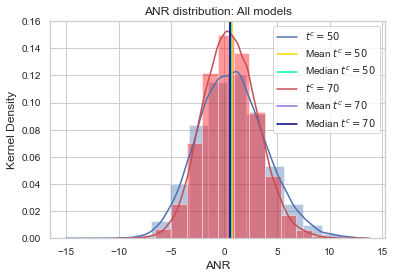

In [83]:
plot_distribution(Ann_returns_50, "ANR", 'b')
plot_distribution(Ann_returns_70, "ANR", 'r')
plt.savefig(f"/users/ryanlucas/Desktop/ANR.png")

In [85]:
del MDD_50['Unnamed: 0']
del MDD_70['Unnamed: 0']

In [93]:
del MDD_50['t_simu']
del MDD_70['t_simu']

/Users/ryanlucas/anaconda3/envs/poker/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/ryanlucas/anaconda3/envs/poker/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


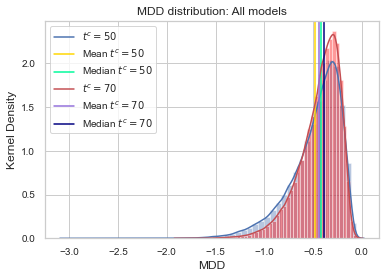

In [94]:
fig, ax = plt.subplots()

plot_distribution(MDD_50, "MDD", 'b')
plot_distribution(MDD_70, "MDD", 'r')
plt.savefig(f"/users/ryanlucas/Desktop/MDD.png")
# ax.set_xlim(-10, 2)

/Users/ryanlucas/anaconda3/envs/poker/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


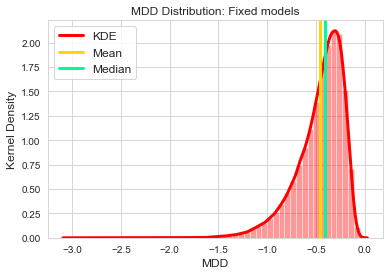

In [14]:
ax = sns.distplot(np.array(MDD_AR).reshape(-1, 1).flatten(),  color = 'red', kde_kws={"color": "r", "lw": 3, "label": "KDE"})
ax.set_xlabel("MDD", fontsize = 12)
ax.axvline(np.array(MDD_AR).reshape(-1, 1).flatten().mean(), color = 'gold', linewidth = 3, label = "Mean")
ax.axvline(stat.median(np.array(MDD_AR).reshape(-1, 1).flatten()), color = 'mediumspringgreen',linewidth = 3, label = "Median")
ax.set_ylabel("Kernel Density", fontsize = 12)
ax.set_title('MDD Distribution: Fixed models', fontsize = 12)
ax.tick_params(labelsize=10)
ax.legend(fontsize = 12)

/Users/ryanlucas/anaconda3/envs/poker/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


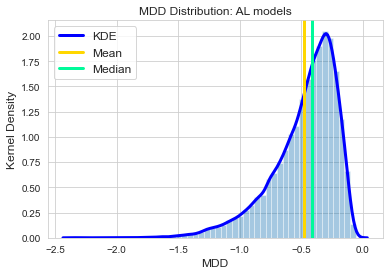

In [15]:
ax = sns.distplot(np.array(MDD_AL_50).reshape(-1, 1).flatten(),  kde_kws={"color": "b", "lw": 3, "label": "KDE"})
ax.set_xlabel("MDD", fontsize = 12)
ax.axvline(np.array(MDD_AL_50).reshape(-1, 1).flatten().mean(), color = 'gold', linewidth = 3, label = "Mean")
ax.axvline(stat.median(np.array(MDD_AL_50).reshape(-1, 1).flatten()), color = 'mediumspringgreen',linewidth = 3, label = "Median")
ax.set_ylabel("Kernel Density", fontsize = 12)
ax.set_title(r'MDD Distribution: AL models', fontsize = 12)
ax.tick_params(labelsize=10)
ax.legend(fontsize = 12)

In [16]:
SR_50 = Sharpe.loc[t50.index]
SR_70 = Sharpe.loc[t70.index]

In [17]:
## Flattening dataframes out to calculate correlations ##

fixed_models_combined_50 = df([np.array(MSE_AR_50).reshape(-1, 1).flatten(), np.array(perc_correct_AR_50).reshape(-1, 1).flatten(), np.array(Sharpe_AR_50).reshape(-1, 1).flatten(), np.array(Ann_return_AR_50).reshape(-1, 1).flatten(), np.array(MDD_AR_50).reshape(-1, 1).flatten()])
fixed_models_combined_50 = fixed_models_combined_50.transpose()
fixed_models_combined_50.columns = ['MSE', "CS", "SR","ANR", "MDD"]

fixed_models_combined_70 = df([np.array(MSE_AR_70).reshape(-1, 1).flatten(), np.array(perc_correct_AR_70).reshape(-1, 1).flatten(), np.array(Sharpe_AR_70).reshape(-1, 1).flatten(), np.array(Ann_return_AR_70).reshape(-1, 1).flatten(), np.array(MDD_AR_70).reshape(-1, 1).flatten()])
fixed_models_combined_70 = fixed_models_combined_70.transpose()
fixed_models_combined_70.columns = ['MSE', "CS", "SR","ANR", "MDD"]

AL_models_combined_50 = df([np.array(MSE_AL_50).reshape(-1, 1).flatten(), np.array(perc_correct_AL_50).reshape(-1, 1).flatten(), np.array(Sharpe_AL_50).reshape(-1, 1).flatten(), np.array(Ann_return_AL_50).reshape(-1, 1).flatten(), np.array(MDD_AL_50).reshape(-1, 1).flatten()])
AL_models_combined_50 = AL_models_combined_50.transpose()
AL_models_combined_50.columns = ['MSE', "CS", "SR","ANR", "MDD"]

AL_models_combined_70 = df([np.array(MSE_AL_70).reshape(-1, 1).flatten(), np.array(perc_correct_AL_70).reshape(-1, 1).flatten(), np.array(Sharpe_AL_70).reshape(-1, 1).flatten(), np.array(Ann_return_AL_70).reshape(-1, 1).flatten(), np.array(MDD_AL_70).reshape(-1, 1).flatten()])
AL_models_combined_70 = AL_models_combined_70.transpose()
AL_models_combined_70.columns = ['MSE', "CS", "SR","ANR", "MDD"]

/Users/ryanlucas/anaconda3/envs/poker/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


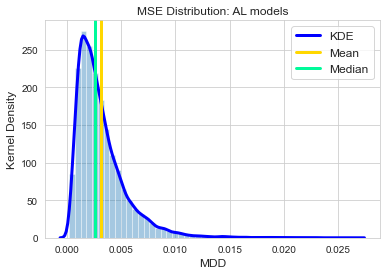

In [18]:
ax = sns.distplot(np.array(AL_models_combined_70['MSE']).reshape(-1, 1).flatten(),  kde_kws={"color": "b", "lw": 3, "label": "KDE"})
ax.set_xlabel("MDD", fontsize = 12)
ax.axvline(np.array(AL_models_combined_70['MSE']).reshape(-1, 1).flatten().mean(), color = 'gold', linewidth = 3, label = "Mean")
ax.axvline(stat.median(np.array(AL_models_combined_70['MSE']).reshape(-1, 1).flatten()), color = 'mediumspringgreen',linewidth = 3, label = "Median")
ax.set_ylabel("Kernel Density", fontsize = 12)
ax.set_title(r'MSE Distribution: AL models', fontsize = 12)
ax.tick_params(labelsize=10)
ax.legend(fontsize = 12)

<ipython-input-19-e1f8a6d106eb>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(fixed_models_combined_50.corr(), dtype=np.bool))
<ipython-input-19-e1f8a6d106eb>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask_1 = np.triu(np.ones_like(AL_models_combined_50.corr(), dtype=np.bool))
<ipython-input-19-e1f8a6d106eb>:5: 

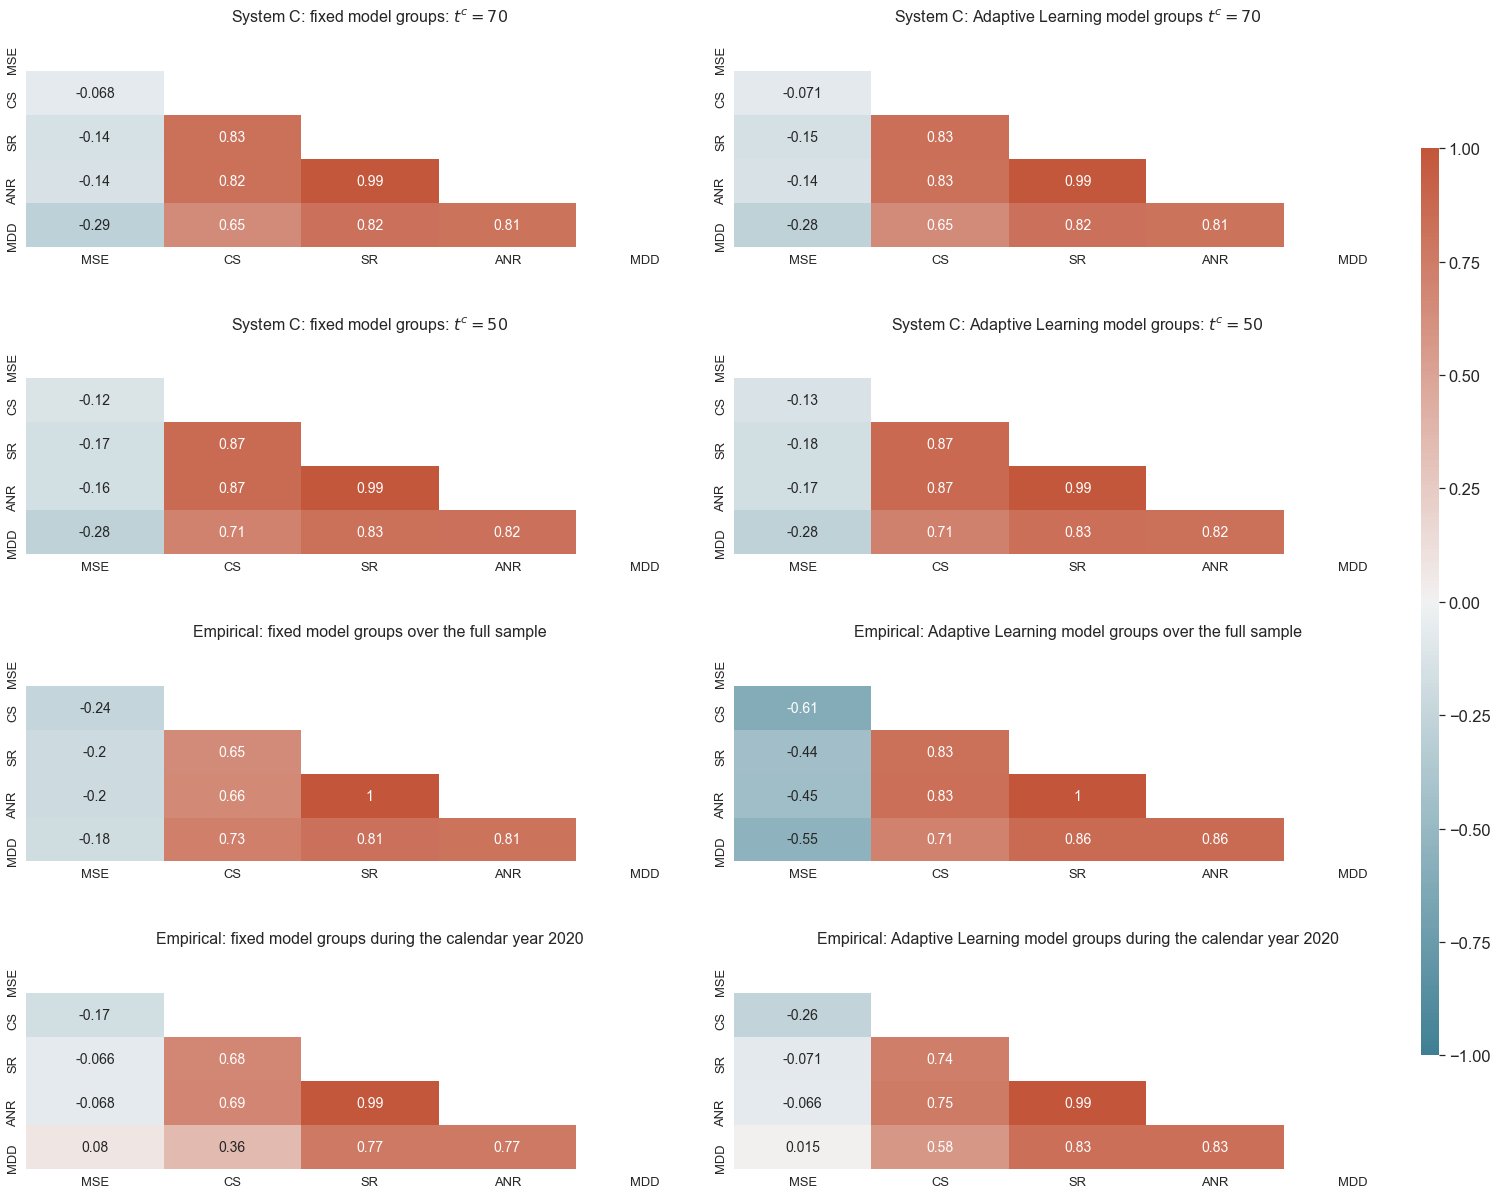

In [19]:
fig, ax = plt.subplots(ncols = 2, nrows = 4, gridspec_kw= {'wspace':0.03, 'hspace':0.4})
sns.set_style('ticks')
mask = np.triu(np.ones_like(fixed_models_combined_50.corr(), dtype=np.bool))
mask_1 = np.triu(np.ones_like(AL_models_combined_50.corr(), dtype=np.bool))
mask_2 = np.triu(np.ones_like(fixed_models_combined_70.corr(), dtype=np.bool))
mask_3 =np.triu(np.ones_like(AL_models_combined_70.corr(), dtype=np.bool)) 
mask_4 = np.triu(np.ones_like(Fixed_models_k3.corr(), dtype=np.bool))
mask_5 = np.triu(np.ones_like(AL_k3.corr(), dtype=np.bool))
fig.set_size_inches(25, 21, forward=True)
sns.set(font_scale = 1.5)
cmap = sns.diverging_palette(220, 20, as_cmap=True)
cbar_ax = fig.add_axes([.90, .2, .01, .6])

annotation_font_size = 14
with sns.axes_style('ticks'):
    sns.heatmap(fixed_models_combined_70.corr(), cmap = cmap,annot = True, mask = mask_2, vmin = -1,vmax = 1, annot_kws={"size":annotation_font_size}, ax = ax[0, 0], cbar = False)
with sns.axes_style('ticks'):
    sns.heatmap(AL_models_combined_70.corr(), cmap = cmap,annot = True, mask = mask_3, vmin = -1,vmax = 1, annot_kws={"size":annotation_font_size}, ax = ax[0, 1], cbar = False)
with sns.axes_style('ticks'):
    sns.heatmap(fixed_models_combined_50.corr(), cmap = cmap, annot = True, mask = mask, vmin = -1,vmax = 1, annot_kws={"size":annotation_font_size}, ax = ax[1, 0], cbar = False)
with sns.axes_style('ticks'):
    sns.heatmap(AL_models_combined_50.corr(),cmap = cmap, annot = True, mask = mask_1, vmin = -1,vmax = 1, annot_kws={"size":annotation_font_size}, ax = ax[1, 1], cbar = True, cbar_kws={"shrink": 1.5}, cbar_ax = cbar_ax)
with sns.axes_style('ticks'):
    sns.heatmap(Fixed_models_k3.corr(), annot = True, cmap = cmap, mask = mask_4, vmin = -1,vmax = 1, annot_kws={"size":annotation_font_size}, ax = ax[2, 0], cbar = False)
with sns.axes_style('ticks'):
    sns.heatmap(AL_k3.corr(), annot = True, cmap = cmap, mask = mask_5, vmin = -1,vmax = 1, annot_kws={"size":annotation_font_size}, ax = ax[2, 1], cbar = False)
with sns.axes_style('ticks'):
    sns.heatmap(Fixed_models_k3_2020.corr(), annot = True, cmap = cmap, vmin = -1,vmax = 1, mask = mask_4, annot_kws={"size":annotation_font_size}, ax = ax[3, 0], cbar = False)
with sns.axes_style('ticks'):
    sns.heatmap(AL_k3_2020.corr(), annot = True, cmap = cmap, mask = mask_5, vmin = -1,vmax = 1, annot_kws={"size":annotation_font_size}, ax = ax[3, 1], cbar_kws={"shrink": 1.5}, cbar_ax = cbar_ax)

tick_label_size = 13
ax[0, 0].tick_params(labelsize = tick_label_size)
ax[0, 1].tick_params(labelsize = tick_label_size)
ax[1, 0].tick_params(labelsize = tick_label_size)
ax[1, 1].tick_params(labelsize = tick_label_size)
ax[2, 0].tick_params(labelsize = tick_label_size)
ax[2, 1].tick_params(labelsize = tick_label_size)
ax[3, 0].tick_params(labelsize = tick_label_size)
ax[3, 1].tick_params(labelsize = tick_label_size)


title_size = 16
ax[0, 0].set_title(r"System C: fixed model groups: $t^c = 70$", fontsize = title_size)
ax[0, 1].set_title(r"System C: Adaptive Learning model groups $t^c = 70$", fontsize = title_size)
ax[1, 0].set_title(r"System C: fixed model groups: $t^c = 50$", fontsize = title_size)
ax[1, 1].set_title(r"System C: Adaptive Learning model groups: $t^c = 50$", fontsize = title_size)
ax[2, 0].set_title("Empirical: fixed model groups over the full sample", fontsize = title_size)
ax[2, 1].set_title("Empirical: Adaptive Learning model groups over the full sample", fontsize = title_size)
ax[3, 0].set_title("Empirical: fixed model groups during the calendar year 2020", fontsize = title_size)
ax[3, 1].set_title("Empirical: Adaptive Learning model groups during the calendar year 2020", fontsize = title_size)


for i in range(4):
    for j in range(2):
        ax[i, j].set_facecolor('white')
        ax[i, j].set_facecolor('white')
        ax[i, j].set_facecolor('white')
        ax[i, j].set_facecolor('white')
        ax[i, j].set_facecolor('white')
        ax[i, j].set_facecolor('white')
        ax[i, j].set_facecolor('white')
        ax[i, j].set_facecolor('white')

plt.savefig("/Users/ryanlucas/Desktop/heatmap_combined.png", bbox_inches = 'tight')